## Import libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import numpy as np


## Load data

In [2]:
# Load your data into a DataFrame
file_path = r'C:\Users\nmilo\OneDrive\Desktop\Studium\Bachelorarbeit\pfr.combine\new_data_final_cleaned.xlsx'
df = pd.read_excel(file_path)

# Define success based on 50th percentile (more than 17 games)
df['NFL_Games_Binary'] = (df['NFL Games'] > 17).astype(int)

# Define features and target variable
features = df.drop(columns=['NFL Games', 'NFL_Games_Binary', 'Player', 'Pos', 'Ht', 'Drafted', 'NFL Snaps', 'Personal Accolades'])
target = df['NFL_Games_Binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

## Initialize and Train the Random Forest Model

In [3]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

## Make Predictions and Calculate Optimal Threshold

In [4]:
# Generate predictions and probabilities
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Determine the optimal threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_rf = thresholds[optimal_idx]

# Generate predictions using the optimal threshold
y_pred_rf_optimal = (y_pred_proba >= optimal_threshold_rf).astype(int)


## Evaluate the Model

In [5]:
# Evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf_optimal)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba)
gini_rf = 2 * roc_auc_rf - 1
precision_rf = precision_score(y_test, y_pred_rf_optimal, zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf_optimal)
f1_rf = f1_score(y_test, y_pred_rf_optimal)

print("Random Forest (Optimal Threshold):")
print(f'Accuracy: {accuracy_rf}')
print(f'ROC AUC: {roc_auc_rf}')
print(f'Gini Coefficient: {gini_rf}')
print(f'Precision: {precision_rf}')
print(f'Recall: {recall_rf}')
print(f'F1 Score: {f1_rf}')


Random Forest (Optimal Threshold):
Accuracy: 0.7365491651205937
ROC AUC: 0.7745219595525431
Gini Coefficient: 0.5490439191050862
Precision: 0.6850152905198776
Recall: 0.8517110266159695
F1 Score: 0.7593220338983051


## Conclusion

## Visualize

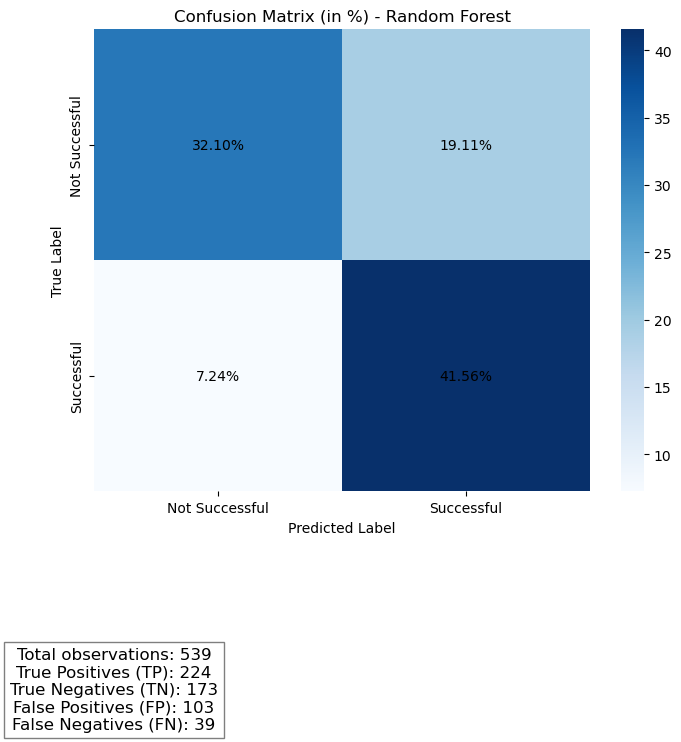

In [6]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf_optimal)
total_observations = np.sum(conf_matrix_rf)
conf_matrix_percent_rf = conf_matrix_rf / total_observations * 100

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent_rf, annot=False, fmt=".2f", cmap="Blues", cbar=True, xticklabels=['Not Successful', 'Successful'], yticklabels=['Not Successful', 'Successful'])

# Manually add the annotations in percentages
for i in range(conf_matrix_percent_rf.shape[0]):
    for j in range(conf_matrix_percent_rf.shape[1]):
        plt.text(j + 0.5, i + 0.5, f'{conf_matrix_percent_rf[i, j]:.2f}%', ha='center', va='center', color='black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (in %) - Random Forest')

# Display total observations and individual counts
tp = conf_matrix_rf[1, 1]
tn = conf_matrix_rf[0, 0]
fp = conf_matrix_rf[0, 1]
fn = conf_matrix_rf[1, 0]

textstr = (f'Total observations: {total_observations}\n'
           f'True Positives (TP): {tp}\n'
           f'True Negatives (TN): {tn}\n'
           f'False Positives (FP): {fp}\n'
           f'False Negatives (FN): {fn}')

plt.gcf().text(0.15, -0.15, textstr, fontsize=12, ha='center', va='top', bbox=dict(facecolor='white', alpha=0.5))

plt.show()


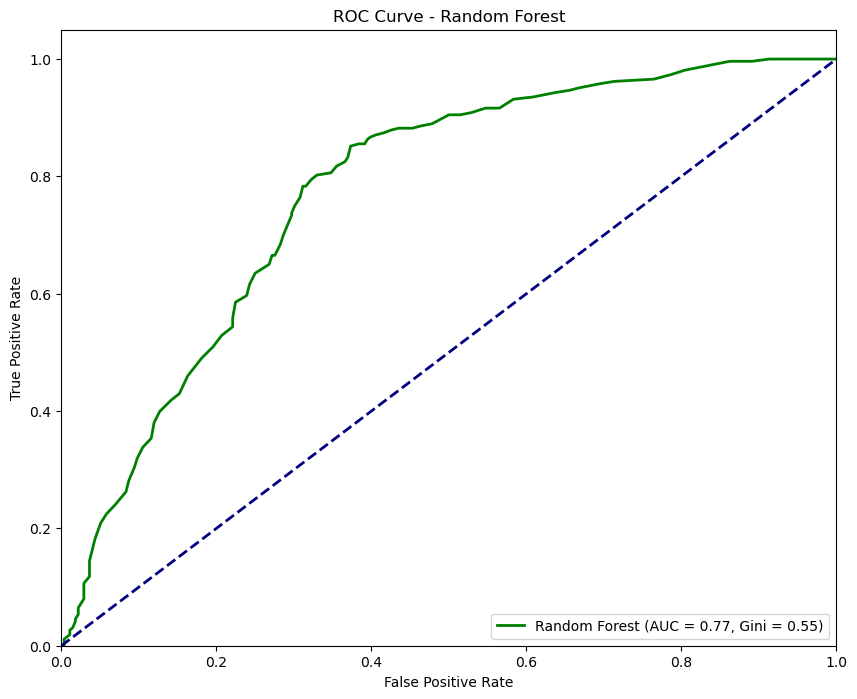

In [7]:
# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f}, Gini = {gini_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


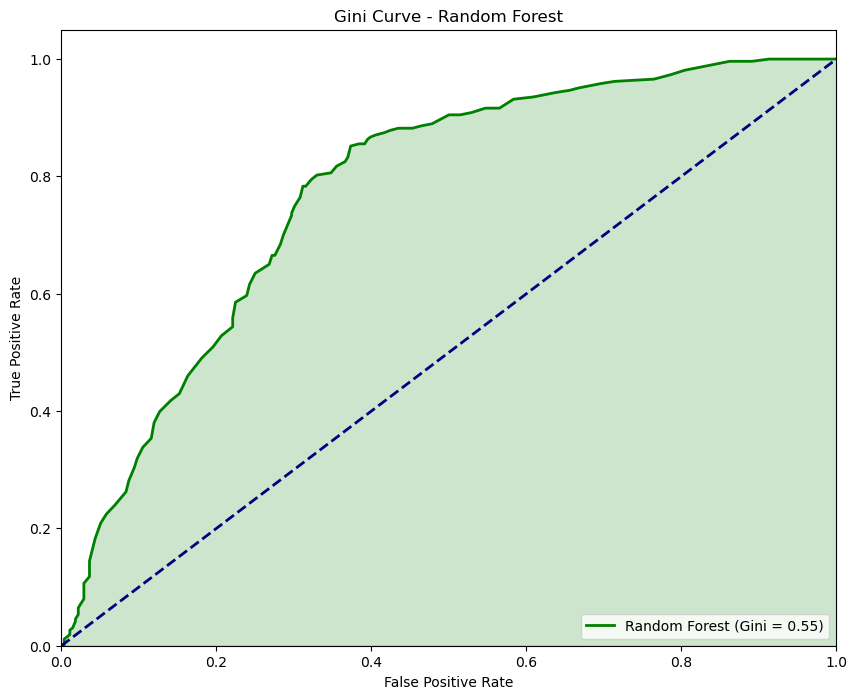

In [8]:
# Gini Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (Gini = {gini_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.fill_between(fpr_rf, tpr_rf, alpha=0.2, color='green')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gini Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

In [9]:
import joblib

# Assuming your random forest model is trained and stored in the variable `rf_model`
joblib.dump(rf_model, 'rf_model.pkl')


['rf_model.pkl']